# WINE QUALITY PREDICTION

## Domain Proyek

Domain proyek yang penulis pilih untuk proyek machine learning kali ini adalah food and beverage dengan judul proyek "Prediksi Kualitas Red Wine menggunakan Random Forest"

## 1. Memanggil *Library* Yang Dibutuhkan

In [2]:
# Library Pengolahan Data
import pandas as pd
import numpy as np
from collections import Counter
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Library Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk Pemodelan
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


## 2. Mempersiapkan *Dataset*

Data yang digunakan untuk proyek kali ini adalah Red Wine Dataset yang diunduh dari [dataset Kaggle](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009). Dataset tersebut memiliki jumlah data sebanyak 1599 baris dengan 11 fitur dan 1 target. Fitur yang dimaksud adalah _fixed acidity_, _volatile acidity_, _citric acid_, _residual sugar_, _chlorides_, _free sulfur dioxide_, _total sulfur dioxide_, _density_, _pH_, _sulphates_, dan _alcohol_ yang bertipe data numerik. Sedangkan _quality_ adalah target yang juga bertipe data numerik.

### 2.1 Mengunduh Dataset Dari Kaggle

In [3]:
# Melakukan Pengaturan API Kaggle 
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
# Mengambil Dataset Dari Kaggle
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 22.8MB/s]


### 2.2 Memuat Dataset

In [5]:
# Ekstrasi Dataset
path = '/content/red-wine-quality-cortez-et-al-2009.zip'
with ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall('working')

In [6]:
# Memuat Dataset Dengan Library Pandas
wines = pd.read_csv('/content/working/winequality-red.csv')

## 3. Pemahaman Data

In [7]:
# Melihat Isi Dataset
wines

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0               7.4             0.700         0.00  ...       0.56      9.4        5
1               7.8             0.880         0.00  ...       0.68      9.8        5
2               7.8             0.760         0.04  ...       0.65      9.8        5
3              11.2             0.280         0.56  ...       0.58      9.8        6
4               7.4             0.700         0.00  ...       0.56      9.4        5
...             ...               ...          ...  ...        ...      ...      ...
1594            6.2             0.600         0.08  ...       0.58     10.5        5
1595            5.9             0.550         0.10  ...       0.76     11.2        6
1596            6.3             0.510         0.13  ...       0.75     11.0        6
1597            5.9             0.645         0.12  ...       0.71     10.2        5
1598            6.0             0.310         0.47  ...       0.66     11.0        6

[1599 rows x 12 columns]

Berikut adalah penjelasan dari variabel-variabel pada dataset Wine :
* **fixed acidity** : kandungan asam yang bersifat fixed
* **volatile acidity** : kandungan asam yang bersifat volatile
* **citric acid** : kandungan asam sitrat
* **residual sugar** : jumlah kandungan gula residual setelah hasil fermentasi 
* **chlorides** : kandungan garam pada wines
* **free sulfur dioxide** : kandungan SO2 dalam bentuk kesetimbangan antara molekul SO2 (sebagai gas terlarut) dan ion bisulfit
* **total sulfur dioxide** : jumlah keseluruhan S02
* **density** : tingkat density cairan
* **pH** : menggambarkan seberapa asam atau basa anggur dalam skala dari 0 (sangat asam) hingga 14 (sangat basa)
* **sulphates** : kadar aditif wines yang dapat berkontribusi pada tingkat gas sulfur dioksida (S02)
* **alcohol** : persentase kandungan alkohol pada wines
* **quality** : variabel output berdasarkan data sensorik dengan skor dari 0 sampai 10

## 4. Eksplorasi Data

Kemudian dilakukan juga eksplorasi data dan visualisasi tentang korelasi antar kolomnya. 

### 4.1 EDA - Deskripsi Variabel

In [8]:
# Melihat Informasi Dataset
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
# Melihat deskripksi tiap kolom
wines.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

### 4.2 EDA - Missing values dan Outliers

In [10]:
# Melakukan cek data kosong
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

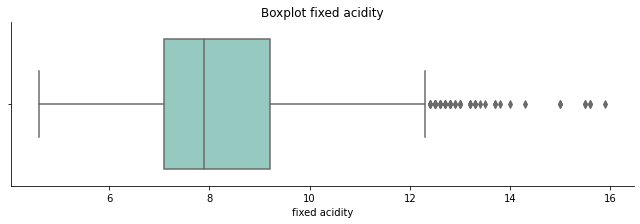

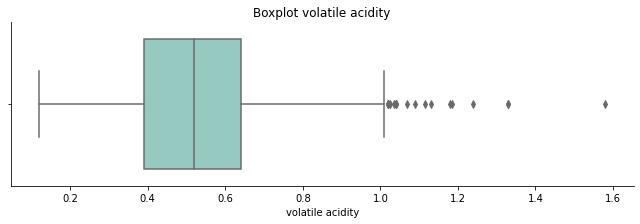

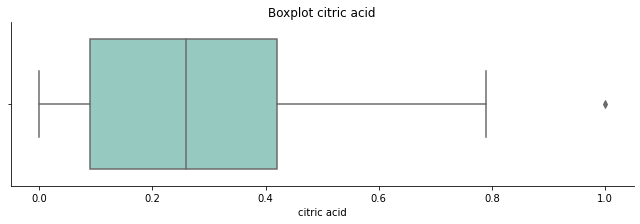

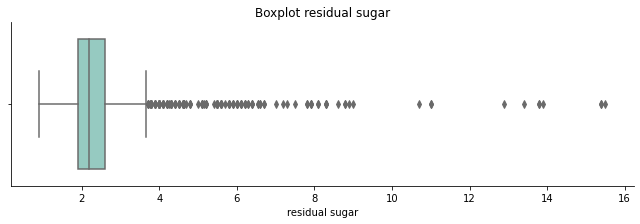

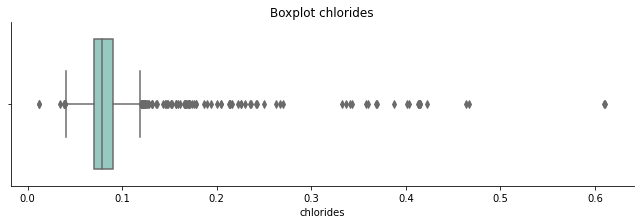

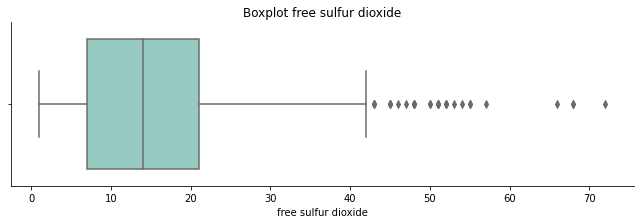

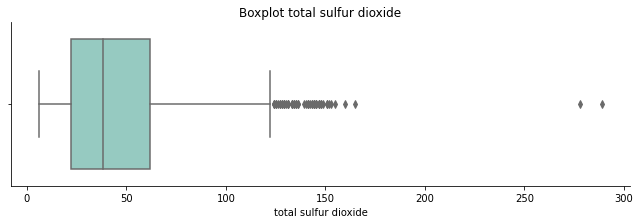

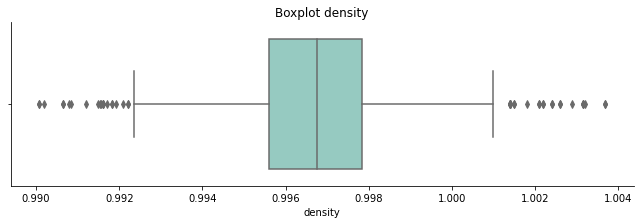

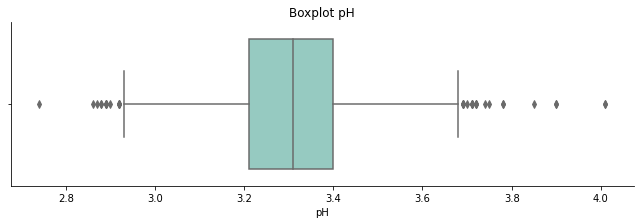

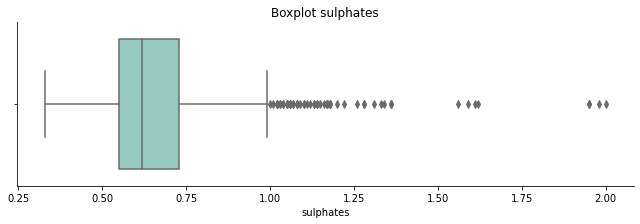

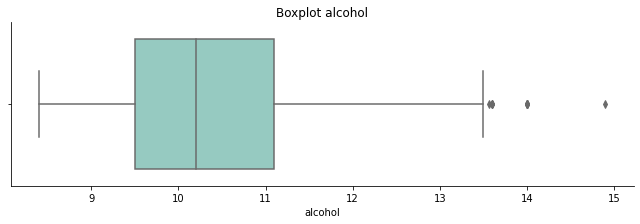

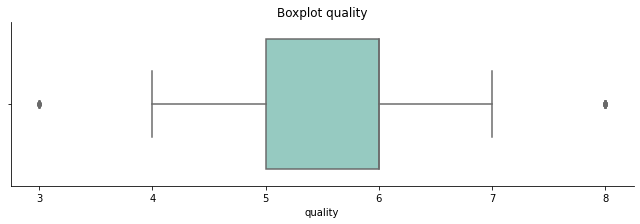

In [11]:
# Mengidentifikasi ouliers
cols = [col for col in wines.columns]
for col in cols:
  sns.catplot(x=col, kind='box', data=wines, aspect=3, height=3, palette = 'Set3')
  plt.title(f'Boxplot {col}')

Mengapus data yang memiliki outlier di lebih dari 2 fitur. Outliers sendiri dapat mempengaruhi performa dari mode

In [12]:
# Membuat Fungsi Untuk Mendeteksi Baris yang memiliki lebih dari 2 outliers pada kolomnya
def detect_outliers(df, features):
  outlier_indices = []

  for f in features:
    # Quartile Pertama
    Q1 = df[f].quantile(0.25)
    # Quartile Kedua
    Q3 = df[f].quantile(0.75)
    # Interquartile Range
    IQR = Q3 - Q1
    # Deteksi outlier beserta index barisnya 
    outlier_list_col = df[((df[f] < Q1 - 1.5 * IQR)|(df[f] > Q3 + 1.5 * IQR))].index
    # Menambahkannya kedalam list
    outlier_indices.extend(outlier_list_col)

  # Menghitung jumlah outlier untuk tiap index
  outlier_indices=Counter(outlier_indices)    
  # Memilih index yang memiliki outlier lebih dari 2
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
  return multiple_outliers

In [13]:
# Melihat Jumlah baris yang memiliki outlier lebih dari 2
print(f"Total baris yang memiliki outliers bernilai > 2 : {len(detect_outliers(wines,cols))} ")
# Cek lokasi
wines.loc[detect_outliers(wines,cols)]

Total baris yang memiliki outliers bernilai > 2 : 37 


fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
353            13.5             0.530         0.79  ...       0.77     13.0        5
364            12.8             0.615         0.66  ...       0.73     10.0        7
366            12.8             0.615         0.66  ...       0.73     10.0        7
374            14.0             0.410         0.63  ...       0.81     10.8        6
440            12.6             0.310         0.72  ...       0.82      9.8        8
442            15.6             0.685         0.76  ...       0.68     11.2        7
538            12.9             0.350         0.49  ...       0.66     12.0        7
554            15.5             0.645         0.49  ...       0.74     11.1        5
555            15.5             0.645         0.49  ...       0.74     11.1        5
557            15.6             0.645         0.49  ...       0.74     11.1        5
559            13.0             0.470         0.49  ...       0.68     12.7        6
564            13.0             0.470         0.49  ...       0.68     12.7        6
652            15.9             0.360         0.65  ...       0.84     14.9        5
690             7.4             1.185         0.00  ...       0.54     10.7        3
1299            7.6             1.580         0.00  ...       0.40     10.9        3
151             9.2             0.520         1.00  ...       2.00      9.4        4
14              8.9             0.620         0.18  ...       0.88      9.2        5
15              8.9             0.620         0.19  ...       0.93      9.2        5
396             6.6             0.735         0.02  ...       0.53      9.9        5
400             6.6             0.735         0.02  ...       0.53      9.9        5
415             8.6             0.725         0.24  ...       1.07      9.3        5
515             8.5             0.655         0.49  ...       1.14      9.3        5
1114            5.0             0.400         0.50  ...       0.66     13.6        6
1244            5.9             0.290         0.25  ...       0.54     10.3        6
1358            7.4             0.640         0.17  ...       0.50      9.5        5
1434           10.2             0.540         0.37  ...       0.77      9.0        6
1435           10.2             0.540         0.37  ...       0.77      9.0        6
1474            9.9             0.500         0.50  ...       0.75      8.8        5
1476            9.9             0.500         0.50  ...       0.75      8.8        5
1558            6.9             0.630         0.33  ...       0.56      9.5        5
614             9.2             0.755         0.18  ...       1.36     10.2        6
695             5.1             0.470         0.02  ...       0.62     12.8        6
1319            9.1             0.760         0.68  ...       1.33      9.1        6
588             5.0             0.420         0.24  ...       0.74     14.0        8
821             4.9             0.420         0.00  ...       0.74     14.0        7
1269            5.5             0.490         0.03  ...       0.82     14.0        8
1270            5.0             0.380         0.01  ...       0.75     14.0        6

[37 rows x 12 columns]

In [14]:
# Melakukan drop outlier
wines = wines.drop(detect_outliers(wines,cols),axis = 0).reset_index(drop = True)
wines.shape

(1562, 12)

### 4.3 EDA - Univariate Analysis

Analisis univariat merupakan analisis yang digunakan pada satu variabel dengan tujuan untuk mengetahui dan mengidentifikasi karakteristik dari variabel tersebut.

Text(0.5, 1.0, 'Persebaran Data Quality')

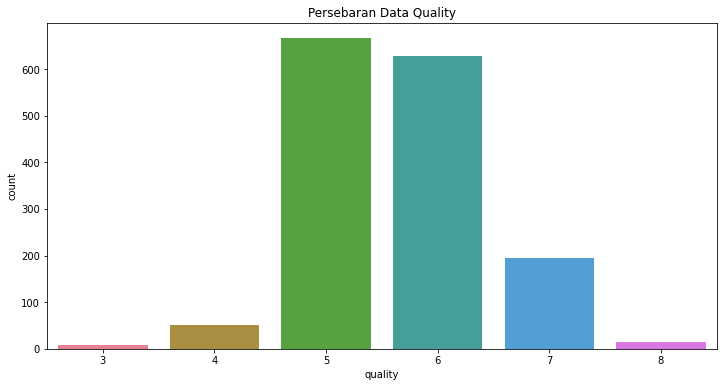

In [15]:
# Melihat Distribusi Quality
plt.figure(figsize=(12, 6))
sns.countplot(x="quality", data=wines, palette='husl');
plt.title('Persebaran Data Quality')

Berdasarkan grafik persebaran data quality, kita dapatkan bahwa persebarannya paling banyak pada quality 5 dan 6. Nantinya nilai quality akan dikelompokkan menjadi 2 kelas, yaitu good (1) untuk quality > 6.5 and not good (0) untuk quality < 6.5.

### 4.4 EDA - Multivariate Analysis

Multivariat analisis adalah seperangkat model statistik yang meneliti pola dalam data multidimensi dengan mempertimbangkan, sekaligus, beberapa variabel data.

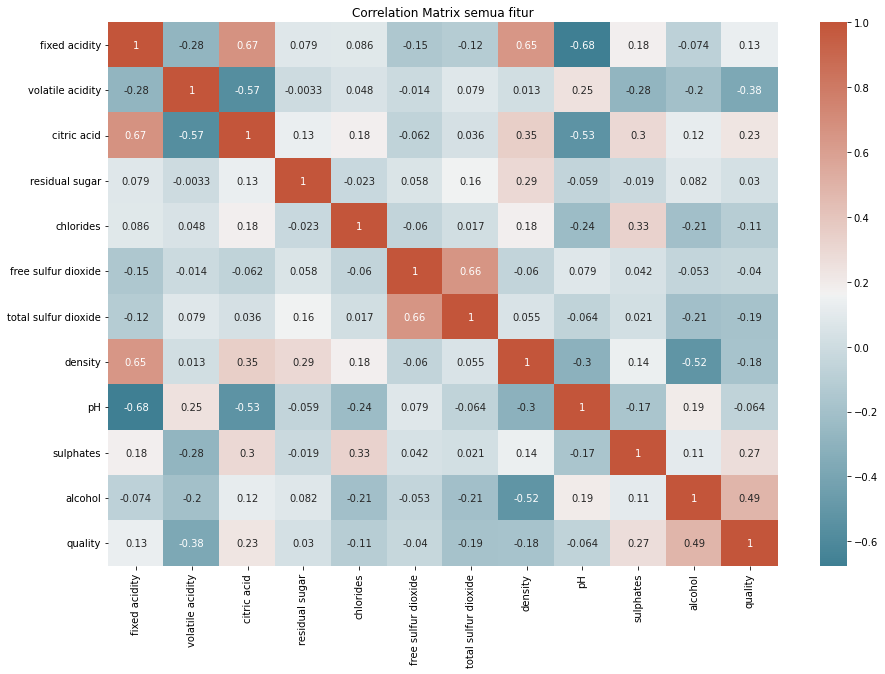

In [16]:
corr = wines.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Correlation Matrix semua fitur")
plt.savefig('correlation.png')
plt.show()

Berdasarkan correaltion matrik diatas, fitur yang memiliki korelasi diantara -0.1 sampai 0.1 dengan fitur quality adalah **residual sugar, free sulfur dioxide,** dan **pH**. Oleh karena itu fitu tersebut nantinya dapat di drop

## 5. Pengolahan Data

Tahap dimana data akan diolah sehingga sudah siap untuk proses pemodelan.

### 5.1 Mempersiapkan Data Untuk Klasifikasi

Mengelompokkan data quality menjadi good dan not good, dimana data yang memiliki label good merupakan red wine yang baik untuk kesehatan. Data yang memiliki nilai quality 0 sampai 6 merupakan wine dengan kualitas not good. Sedangkan data yang memiliki nilai 7 sampai 10 merupakan wine dengan kualitas good.

Text(0.5, 1.0, 'Proporsi Good Quality')

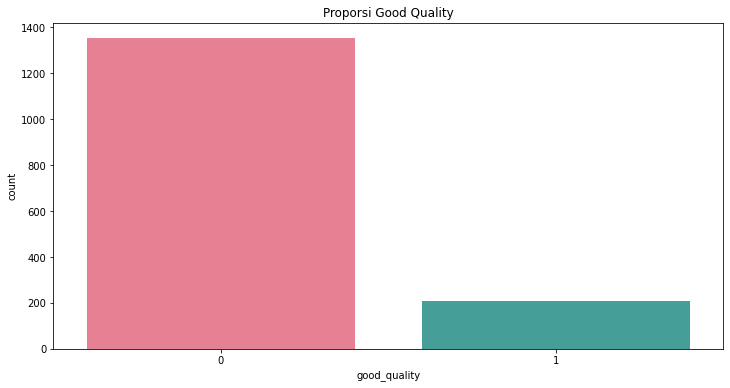

In [17]:
# Membuat fitur klasifikasi good dan not good pada fitur quality
wines['good_quality'] = [1 if n > 6.5 else 0 for n in wines['quality']]
# Melihat proporsi klasifikasi
plt.figure(figsize=(12, 6))
sns.countplot(x="good_quality", data=wines, palette='husl');
plt.title('Proporsi Good Quality')

Tidak mengikutkan fitur residual sugar, free sulfur dioxide, dan pH karena memiliki tingkat korelasi berada diantara -0.1 sampai 0.1 terhadap quality

In [18]:
# Memisahkan fitur dan target
X = wines.drop(['quality', 'good_quality', 'residual sugar', 'free sulfur dioxide', 'pH'], axis = 1)
y = wines['good_quality']

Membagi dataset menjadi data train dan data test dengan rasio 80% untuk data train dan 20% untuk data test. Tujuan dilakukan pembagian adalah supaya dapat menguji performa model. Dimana data train digunakan untuk melatih model, sedangkan data _test_ merupakan data yang digunakan untuk menguji model setelah melalui pelatihan data.

In [19]:
# Membagi train dan test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 610)

### 5.2 Standarisasi

Standarisasi yang dilakukan adalah menggunakan teknik StandardScaler, dimana data akan dikurangi dengan nilai rata-rata kemudian dibagi dengan standar deviasi, sehingga dataset akan memiliki standar deviasi sebesar 1 dan rata-rata sama dengan 0.

In [20]:
# Standarisasi Fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 6. Pemodelan

Pada langkah ini dibuat sebuah model Random Forest dengan library scikit-learn RandomForestClassifier. Dalam pemodelan ini model dibuat tanpa parameter tambahan.

In [21]:
# Pelatihan model baseline
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# Pengujian model baseline
y_pred = rf.predict(X_test)
bs_report = classification_report(y_test,y_pred,output_dict=True, target_names=['Not Good','Good'])
pd.DataFrame(bs_report).transpose()


precision    recall  f1-score     support
Not Good       0.916084  0.970370  0.942446  270.000000
Good           0.703704  0.441860  0.542857   43.000000
accuracy       0.897764  0.897764  0.897764    0.897764
macro avg      0.809894  0.706115  0.742652  313.000000
weighted avg   0.886907  0.897764  0.887550  313.000000

## 7. Tuning Model

Di langkah ini model baseline yang sudah dibuat kemudian dikembangkan kinerjanya. Untuk meningkatkan kinerja model maka dilakukan pencarian hyperparameter yang optimal untuk model dengan GridSearchCV. Setelah ditemukan hyperparameter terbaik dari proses GridSearchCV, kemudian diterapkan ke model baseline

In [23]:
# Hyper parameter yang akan dituning
params_rf = {'n_estimators':[5,10,15,20,25,30,40,50],
            'max_depth':[1,3,5,7,9,11,13,15,17],
            'max_features':['log2','sqrt']}

# Pencarian parameter terabaik dengan Grid Search CV
rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator = rf,
                      param_grid = params_rf,
                      cv=3,
                      scoring = 'accuracy',
                      verbose = 1,
                      n_jobs = -1)
grid_rf.fit(X_train, y_train)
y_pred = grid_rf.predict(X_test)

# Hasil tuning hyperparameter dengan skor terbaik yang didapatkan
print(f"Best Parameter : {grid_rf.best_params_}")
print(f"Best Score : {grid_rf.best_score_}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    4.4s


Best Parameter : {'max_depth': 13, 'max_features': 'log2', 'n_estimators': 50}
Best Score : 0.9159364815839636


[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:   19.5s finished


In [24]:
# Menerapkan hyperparameter hasil tuning
rf = RandomForestClassifier(max_depth = 13, n_estimators = 10, max_features='sqrt')
rf.fit(X_train, y_train)
# Pengujian Model Terhadap Test Dataset
y_pred = rf.predict(X_test)
# Hasil klasifikasi tuning model
tm_report = classification_report(y_pred,y_test,output_dict=True, target_names=['Not Good','Good'])
pd.DataFrame(tm_report).transpose()


precision    recall  f1-score     support
Not Good       0.974074  0.910035  0.940966  289.000000
Good           0.395349  0.708333  0.507463   24.000000
accuracy       0.894569  0.894569  0.894569    0.894569
macro avg      0.684711  0.809184  0.724214  313.000000
weighted avg   0.929699  0.894569  0.907726  313.000000

## 8. Evaluasi

Model yang telah dibuat kemudian dilakukan evaluasi. Karena model merupakan tipe klasifikasi, maka evaluasinya akan digunakan metriks akurasi, f1-score, precision, dan recall.

In [25]:
# Membuat dataframe untuk menampung hasil evaluasi
header = pd.MultiIndex.from_product([['Not Good','Good'],
                                     ['accuracy','precision','f1-score','recall']])
metrics = pd.DataFrame(columns =header, index=['Model Baseline', 'Model Tuning'])

metrics

Not Good                     ...      Good                
               accuracy precision f1-score  ... precision f1-score recall
Model Baseline      NaN       NaN      NaN  ...       NaN      NaN    NaN
Model Tuning        NaN       NaN      NaN  ...       NaN      NaN    NaN

[2 rows x 8 columns]

Hasil evaluasi pada model baseline dan model tuning adalah sebagai berikut,

In [26]:
# Membandingkan hasil model baseline dengan model tuning
metrics.loc['Model Baseline',('Not Good', 'precision')]= bs_report['Not Good']['precision']
metrics.loc['Model Baseline',('Not Good','recall')] = bs_report['Not Good']['recall']
metrics.loc['Model Baseline',('Not Good','f1-score')] = bs_report['Not Good']['f1-score']
metrics.loc['Model Baseline',('Not Good','accuracy')] = bs_report['accuracy']

metrics.loc['Model Baseline',('Good', 'precision')]= bs_report['Good']['precision']
metrics.loc['Model Baseline',('Good','recall')] = bs_report['Good']['recall']
metrics.loc['Model Baseline',('Good','f1-score')] = bs_report['Good']['f1-score']
metrics.loc['Model Baseline',('Good','accuracy')] = bs_report['accuracy']

metrics.loc['Model Tuning',('Not Good', 'precision')]= tm_report['Not Good']['precision']
metrics.loc['Model Tuning',('Not Good','recall')] = tm_report['Not Good']['recall']
metrics.loc['Model Tuning',('Not Good','f1-score')] = tm_report['Not Good']['f1-score']
metrics.loc['Model Tuning',('Not Good','accuracy')] = tm_report['accuracy']

metrics.loc['Model Tuning',('Good', 'precision')]= tm_report['Good']['precision']
metrics.loc['Model Tuning',('Good','recall')] = tm_report['Good']['recall']
metrics.loc['Model Tuning',('Good','f1-score')] = tm_report['Good']['f1-score']
metrics.loc['Model Tuning',('Good','accuracy')] = tm_report['accuracy']

# Menampilkan Hasil pembandingan metrics
metrics



Not Good                      ...      Good                    
                accuracy precision  f1-score  ... precision  f1-score    recall
Model Baseline  0.897764  0.916084  0.942446  ...  0.703704  0.542857   0.44186
Model Tuning    0.894569  0.974074  0.940966  ...  0.395349  0.507463  0.708333

[2 rows x 8 columns]

Kemudian untuk mencari fitur yang paling berpengaruh, mari kita visualisasikan feature importances dari model,

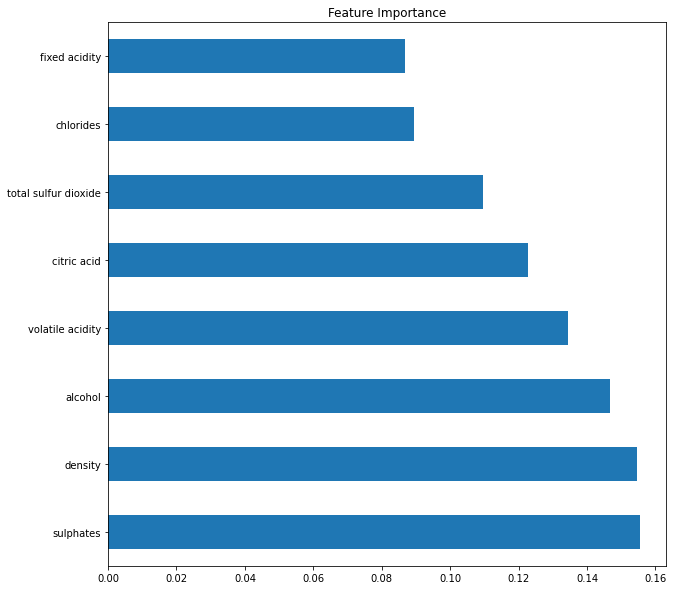

In [27]:
# Melihat fitur yang paling berpengaruh
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))
plt.title("Feature Importance")
plt.show()

Dari visualisasi tersebut dapat dilihat bahwa 3 fitur paling berpengaruh pada prediksi kualitasi wine adalah tingkat alcohol, sulphates, dan total sulfur dioxide.

In [28]:
# Filtering wines hanya untuk good quality
wines_temp = wines[wines['good_quality']==1]
display(wines_temp.describe())
# Filtering wines hanya untuk not good quality
wines_temp2 = wines[wines['good_quality']==0]
display(wines_temp2.describe())

fixed acidity  volatile acidity  ...     quality  good_quality
count     209.000000        209.000000  ...  209.000000         209.0
mean        8.792823          0.402368  ...    7.071770           1.0
std         1.853296          0.144637  ...    0.258727           0.0
min         5.100000          0.120000  ...    7.000000           1.0
25%         7.400000          0.300000  ...    7.000000           1.0
50%         8.700000          0.360000  ...    7.000000           1.0
75%        10.100000          0.480000  ...    7.000000           1.0
max        15.000000          0.915000  ...    8.000000           1.0

[8 rows x 13 columns]

fixed acidity  volatile acidity  ...      quality  good_quality
count    1353.000000       1353.000000  ...  1353.000000        1353.0
mean        8.204878          0.545477  ...     5.413156           0.0
std         1.614044          0.174172  ...     0.595872           0.0
min         4.600000          0.160000  ...     3.000000           0.0
25%         7.100000          0.420000  ...     5.000000           0.0
50%         7.800000          0.540000  ...     5.000000           0.0
75%         9.000000          0.650000  ...     6.000000           0.0
max        14.300000          1.330000  ...     6.000000           0.0

[8 rows x 13 columns]

## Kesimpulan

Dengan melihat detail dari good quality dan not good quality, kita dapat melihat bahwa wines dengan kualitas baik memiliki kadar alkohol rata-rata lebih tinggi, rata-rata memiliki keasaman volatil yang lebih rendah, kadar sulfat rata-rata yang lebih tinggi, dan kadar gula residual rata-rata yang lebih tinggi.

### Referensi
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
* https://www.kaggle.com/namanmanchanda/red-wine-eda-and-classification
* https://www.kaggle.com/tommorowsengineer/wine-quality-classification-100-accuracy-with-knn